## Testing Normality and Goodness of Fit 

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 
import scipy.stats as stats
import scipy.special as sps

In [2]:
binedges=np.linspace(-4,4,60)
rng = np.random.RandomState(10)

In [4]:
nml=rng.normal(0,1,size=10000)  #Draw samples from normal

In [5]:
stats.skew(nml)   #skewness has to be close to zero

-0.028247129262427135

In [6]:
stats.kurtosis(nml, fisher=False)  #kurtosis has to be close to 3

3.000175399644792

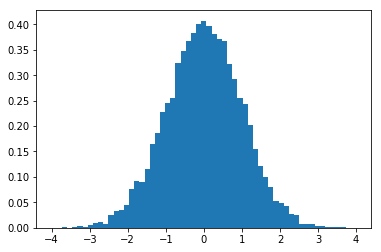

In [7]:
plt.hist(nml, bins=binedges, normed=True)
plt.show()

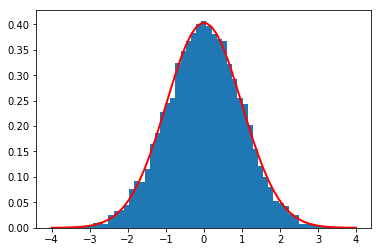

In [8]:
plt.hist(nml, bins=binedges, normed=True)
p = mlab.normpdf(binedges, np.mean(nml), np.std(nml))
plt.plot(binedges, p, 'r', linewidth=2)
plt.show()

In [10]:
s = rng.standard_t(5, size=10000)  #Draw samples from another distribution

In [11]:
stats.skew(s)

-0.04144913044586708

In [12]:
stats.kurtosis(s, fisher=False)

6.025602345432429

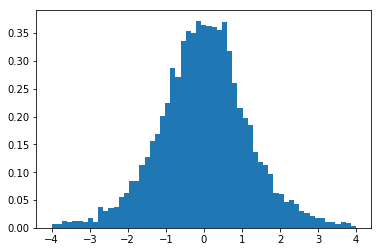

In [13]:
plt.hist(s, bins=binedges, normed=True)   #It appears normal but this has a fat tails
plt.show()

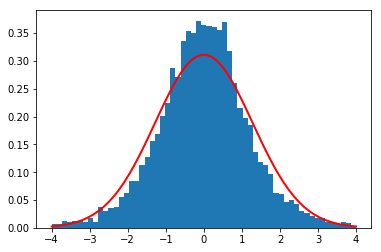

In [14]:
plt.hist(s, bins=binedges, normed=True)
p = mlab.normpdf(binedges, np.mean(s), np.std(s))  #data is not normal
plt.plot(binedges, p, 'r', linewidth=2)
plt.show()

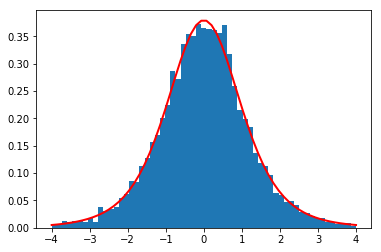

In [15]:
plt.hist(s, bins=binedges, normed=True)
p = stats.t.pdf(binedges, 5)
plt.plot(binedges, p, 'r', linewidth=2)   #The correct distribution is Student-t 
plt.show()

In [16]:
alpha, loc, beta=5, 100, 22
g = stats.gamma.rvs(alpha,loc=loc,scale=beta,size=5000)  #generate data from another distribution 

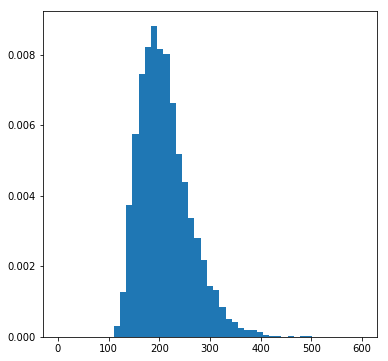

In [17]:
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)
x = np.linspace(0,600)
ghist = ax.hist(g, bins=x, normed=True)  #looks normal but it is skewed to the right
plt.show()

In [18]:
stats.skew(g)   #skewness is positive

0.9149783997782244

In [19]:
stats.kurtosis(g, fisher=False)

4.182965824235845

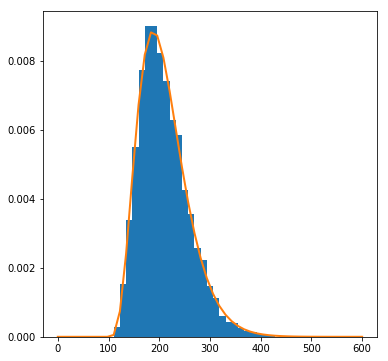

In [28]:
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)
ghist = ax.hist(g, bins=x, normed=True)  #The distribution is gamma
rv = stats.gamma(alpha,loc,beta)
h = ax.plot(x, rv.pdf(x), lw=2)
# show
plt.show()

In [27]:
JB,pvalue=stats.jarque_bera(nml)
print('JB = ', JB)
print('pvalue = ', pvalue)

JB =  1.32984667138
pvalue =  0.514312955644


In [28]:
KS,pvalue=stats.kstest(nml,'norm')
print('KS = ', KS)
print('pvalue = ', pvalue)

KS =  0.00841846123884
pvalue =  0.477789382248


In [31]:
KS,pvalue=stats.kstest(s,'norm')
print('KS = ', KS)
print('pvalue = ', pvalue)

KS =  0.0317302103227
pvalue =  3.59767597719e-09


In [30]:
KS,pvalue=stats.kstest(s,'t',(5,))
print('KS = ', KS)
print('pvalue = ', pvalue)

KS =  0.00781777993387
pvalue =  0.574053928676


In [33]:
stats.kstest(g, 'gamma', (5, 100, 22))

KstestResult(statistic=0.012493536788342419, pvalue=0.41601617651637468)

In [34]:
stats.kstest(g, lambda x: stats.gamma.cdf(x, 5, 100, 22))

KstestResult(statistic=0.012493536788342419, pvalue=0.41601617651637468)